In [65]:
import subprocess
subprocess.run(['jupyter', 'nbconvert', '--to', 'python', 'IIR_BandPass.ipynb'])

CompletedProcess(args=['jupyter', 'nbconvert', '--to', 'python', 'IIR_BandPass.ipynb'], returncode=0)

In [2]:
def getCutOffF(ft):
    lowCut = ft/((10**(3/10))**(1/6))
    highCut= ft*((10**(3/10))**(1/6))
    return lowCut, highCut

In [5]:
from analyze.by3OctBand import trueFList
import analyze.bandpass as bandpass
import csv

In [160]:
for ft in trueFList:
    lowCut, highCut = getCutOffF(ft)
    sos = bandpass.mk_bandPassFilter(lowCut,highCut,48000.0)
        
    a = np.zeros(5)
    for sec in sos:
        sec = np.delete(sec,3)
        a = np.vstack((a,sec))
    a = a[1:]
    with open("BandPass.csv","a", newline='') as f:
            t = [ft]
            writer = csv.writer(f, lineterminator = ",\n")
            writer.writerow(t)
            writer.writerows(a)

In [11]:
ft = 1000.0
lowCut, highCut = getCutOffF(ft)
sos = bandpass.mk_bandPassFilter(lowCut,highCut,48000.0)

## F特チェック

In [12]:
from scipy.signal import sosfreqz
w, h = sosfreqz(sos, worN = 24000*100)#worNは周波数分解能

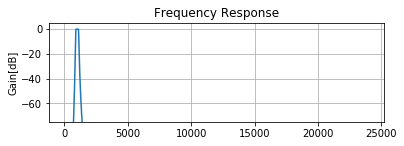

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
dB = 20 * np.log10(np.abs(h)+1e-30)
plt.plot(w*48000.0/(2.0*np.pi) ,dB)
plt.ylim(-75,5)
plt.grid(True)
plt.yticks([0,-20,-40,-60])
plt.ylabel("Gain[dB]")
plt.title("Frequency Response")
# plt.xlim(0, 2)
plt.show()

## JIS1514

In [62]:
high1 = ft*1.02667 # -0.3+0.4
high2 = ft*1.05575 # -0.3+0.6
high3 = ft*1.08746 # -0.3+1.3
#highcut
high4 = ft*1.29437 # 2 5

In [64]:
dB[129437]

-56.74584110719842

In [117]:
a = sos[0]
b = np.delete(a, 3)
b

array([ 4.28391509e-28,  8.56783018e-28,  4.28391509e-28, -1.99922793e+00,
        9.99239234e-01])

In [158]:
import csv
with open("BandPass.csv","a", newline='') as f:
    t = [ft]
    writer = csv.writer(f, lineterminator=",\n")
    writer.writerow(t)
    for row in sos:
        writer.writerow(row)